In [1]:
# This notebook is an attempt to analyse the Time Series adn forcast for Passenger Data using ARIMA and Fast Fourier Transform.

# Suppressing some warning for clearner Notebook.
import warnings
warnings.filterwarnings("ignore")

# Firing up some libraries requred for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Importing the data
data = pd.read_csv('..\Data Sets\AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [2]:
# Converting the index to time series instead of int

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('..\Data Sets\AirPassengers.csv', parse_dates=True, index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


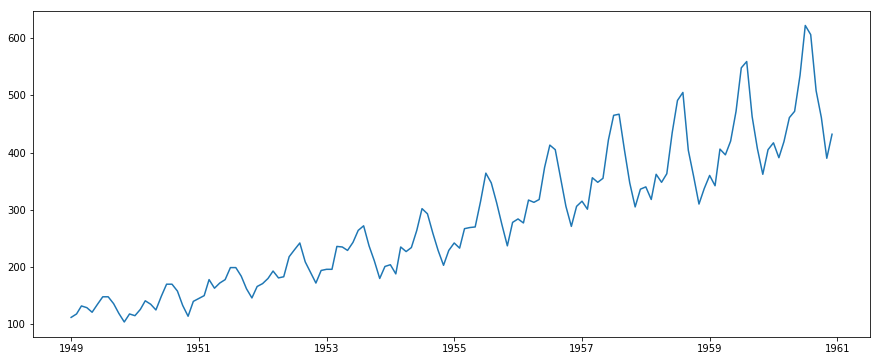

In [3]:
# Visualize the data.
ts = data["#Passengers"]
ts = ts.astype(float)
plt.plot(ts)
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Thu, 18 Jan 2018   AIC                           1344.043
Time:                        11:40:53   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passeng

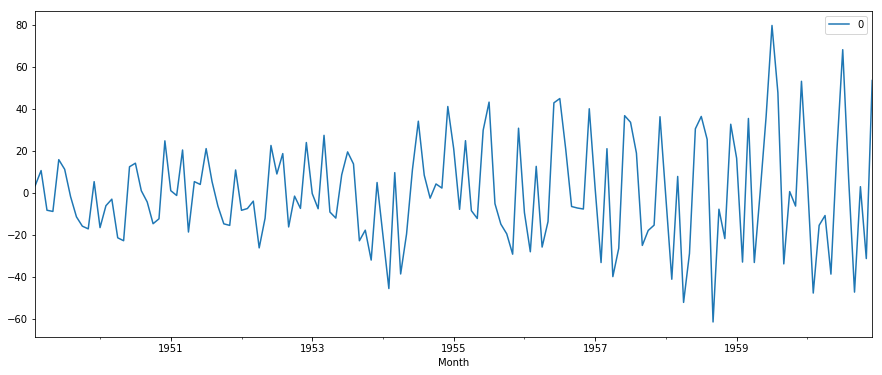

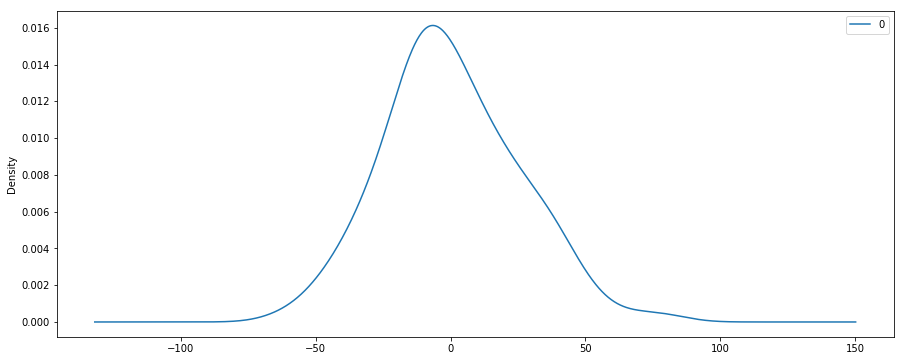

                0
count  143.000000
mean     0.371510
std     25.142872
min    -61.345848
25%    -15.611184
50%     -2.312105
75%     17.613426
max     79.632942


In [4]:
# Fitting ARIMA Model
model = ARIMA(ts, order=(2, 1, 2))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [5]:
# Forcasting Values
# Suppose you want n next forcasts. The we can call the forcast function n times and append in a list.
# Forcast Method will make the predictions for us. All we need to do is append the predicted values 
# to the original and see the plot.

# # Defining number of predictions that you want.
n = 100
output = model_fit.forecast(steps = n)
periods = len (output[0])
rng = pd.date_range('1960-12-01', periods = periods, freq = 'M')
ts = ts.append(pd.Series(output[0], index = rng))

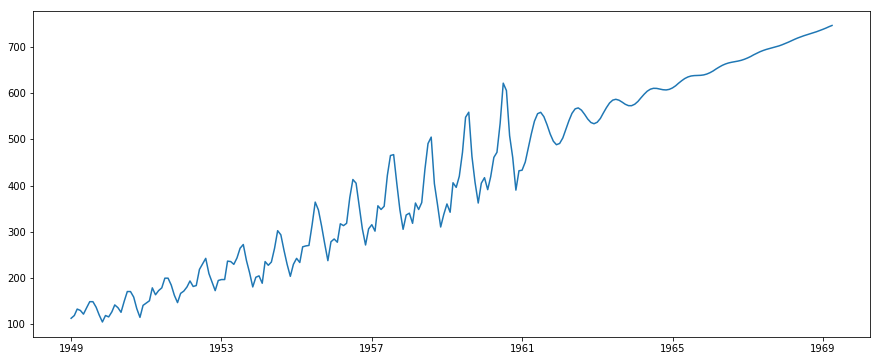

In [6]:
# After we have appended the results to the existing time frame, we need to plot it.

plt.plot(ts)
plt.show()

In [7]:
# In the above plot we can see that we have extended the out plot by the forcasted values. Which is not a good prediction.